<a href="https://colab.research.google.com/github/farhanwew/GI-polyp/blob/main/RT-DETR/1.finetune_rf_detr_on_detection_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train RF-DETR Object Detection on a Custom Dataset

---

[![hf space](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/SkalskiP/RF-DETR)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/how-to-finetune-rf-detr-on-detection-dataset.ipynb)
[![roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/rf-detr)
[![code](https://badges.aleen42.com/src/github.svg)](https://github.com/roboflow/rf-detr)

RF-DETR is a real-time, transformer-based object detection model architecture developed by Roboflow and released under the Apache 2.0 license.

![rf-detr-coco-rf100-vl-8](https://media.roboflow.com/rfdetr/pareto.png)

The RF-DETR family of models stands as the quickest and most precise in object detection across all sizes. RF-DETR has achieved over 60 mAP on the Microsoft COCO benchmark, a leading measure of object detection performance. It also sets new records on RF100-VL, a benchmark that shows how well models adapt to real-world problems beyond standard datasets.

The RF-DETR model group includes five sizes: Nano, Small, Medium, Base, and Large. These models offer a range of options for different needs. For example, RF-DETR-Nano is 11 mAP higher than YOLO11-n (on mAP50:95) and runs 0.17 ms faster. Likewise, RF-DETR-Small is 1.8 mAP better than YOLO11-x (the biggest YOLO11 model) and speeds things up by a good 7.77 ms. This wide range of models makes RF-DETR a great choice for many real-world uses, from small devices that need to be super fast to bigger jobs that demand top precision.

RF-DETR is small enough to run on edge devices, making it perfect for deployments that need both high accuracy and real-time performance. You can easily get started with any of the RF-DETR models, as they're ready for training in the cloud with Roboflow or through the free RF-DETR Python package.

## Environment setup

### Configure API Key

To fine-tune RF-DETR, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy` to copy your private API key.
- In Colab, go to the left pane and click on `Secrets` (🔑).
    - Store your Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [1]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

### Check GPU availability

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `T4 GPU`, and then click `Save`.

In [2]:
!nvidia-smi

Fri Oct 10 03:45:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   38C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Install dependencies

Installs RF-DETR version 1.2.1 or higher (which includes the new Nano, Small, and Medium checkpoints), along with Supervision for benchmarking and Roboflow for pulling datasets and uploading models to the Roboflow platform.

In [3]:
!pip install -q rfdetr==1.2.1 supervision==0.26.1 roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.8/372.8 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Download example data

Downloads example images for testing. You can use these or replace them with your own images.

In [4]:
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg

## Inference with Pre-trained COCO Model

Runs inference on an example image using a pretrained RF-DETR Medium model (trained on COCO). To use a different model size, simply replace `RFDETRMedium` with `RFDETRNano`, `RFDETRSmall`, `RFDETRBase` or `RFDETRLarge` as needed.

rf-detr-medium.pth: 100%|██████████| 386M/386M [00:18<00:00, 21.9MiB/s]


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


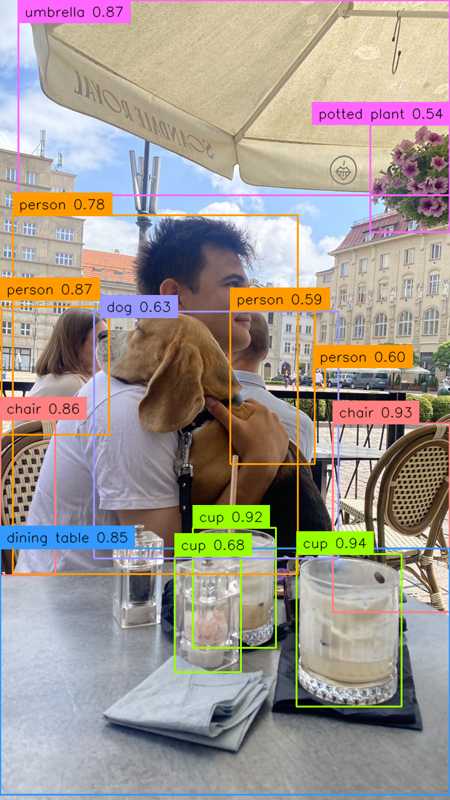

In [5]:
import numpy as np
import supervision as sv

from PIL import Image

from rfdetr import RFDETRMedium
from rfdetr.util.coco_classes import COCO_CLASSES

image = Image.open("dog-2.jpeg")

model = RFDETRMedium(resolution=640)
model.optimize_for_inference()

detections = model.predict(image, threshold=0.5)

color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])
text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    smart_position=True
)

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = bbox_annotator.annotate(annotated_image, detections)
annotated_image = label_annotator.annotate(annotated_image, detections, labels)
annotated_image.thumbnail((800, 800))
annotated_image

## Download Dataset from Roboflow Universe

RF-DETR expects the dataset to be in COCO format. Divide your dataset into three subdirectories: `train`, `valid`, and `test`. Each subdirectory should contain its own `_annotations.coco.json` file that holds the annotations for that particular split, along with the corresponding image files. Below is an example of the directory structure:

```
dataset/
├── train/
│   ├── _annotations.coco.json
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ... (other image files)
├── valid/
│   ├── _annotations.coco.json
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ... (other image files)
└── test/
    ├── _annotations.coco.json
    ├── image1.jpg
    ├── image2.jpg
    └── ... (other image files)
```

[Roboflow](https://roboflow.com/annotate) allows you to create object detection datasets from scratch or convert existing datasets from formats like YOLO, and then export them in COCO JSON format for training. You can also explore [Roboflow Universe](https://universe.roboflow.com/) to find pre-labeled datasets for a range of use cases.

In [6]:
# from roboflow import download_dataset

# dataset = download_dataset("https://universe.roboflow.com/roboflow-jvuqo/basketball-player-detection-2/13", "coco")

In [7]:
%%capture
import kagglehub
from google.colab import userdata
username = userdata.get('KAGGLE_USERNAME')
key = userdata.get('KAGGLE_KEY')
%env KAGGLE_USERNAME=$username
%env KAGGLE_KEY=$key

In [8]:
!kaggle datasets download farhanwew/gastrointestinal-endoscopy-polyp-dataset

Dataset URL: https://www.kaggle.com/datasets/farhanwew/gastrointestinal-endoscopy-polyp-dataset
License(s): unknown
 79% 481M/605M [00:00<00:00, 1.68GB/s]
100% 605M/605M [00:00<00:00, 1.64GB/s]


In [9]:
%%capture
!unzip gastrointestinal-endoscopy-polyp-dataset.zip

In [10]:
!wget -q https://raw.githubusercontent.com/farhanwew/GI-polyp/refs/heads/main/coco/annotations.json

In [14]:
import os, json, random, shutil

# Path dataset asli
base = "Gastrointestinal endoscopy polyp dataset"
images_dir = os.path.join(base, "Polyp-Images")
ann_file = os.path.join("annotations.json")  # file COCO asli (full anotasi)

# Path output dataset split
out_base = "dataset"
os.makedirs(out_base, exist_ok=True)

# Load COCO full annotations
with open(ann_file, "r") as f:
    coco = json.load(f)

images = coco["images"]
annotations = coco["annotations"]

# ✅ Tambahkan supercategory kalau belum ada
categories = []
for c in coco["categories"]:
    if "supercategory" not in c:
        c["supercategory"] = "none"
    categories.append(c)

# Shuffle images
random.shuffle(images)

# Rasio split (80% train, 20% val/test)
train_split = 0.8
train_idx = int(len(images) * train_split)
train_imgs = images[:train_idx]
val_imgs = images[train_idx:]  # ini dipakai untuk val & test

# Helper: filter anotasi sesuai gambar split
def filter_annotations(imgs):
    img_ids = set(img["id"] for img in imgs)
    return [ann for ann in annotations if ann["image_id"] in img_ids]

# Fungsi simpan split dataset
def save_split(name, imgs):
    split_dir = os.path.join(out_base, name)
    os.makedirs(split_dir, exist_ok=True)

    anns = filter_annotations(imgs)

    coco_split = {
    "info": coco.get("info", {}),
    "licenses": coco.get("licenses", []),
    "categories": categories,
    "images": imgs,
    "annotations": anns
    }

    # Simpan anotasi COCO
    with open(os.path.join(split_dir, "_annotations.coco.json"), "w") as f:
        json.dump(coco_split, f, indent=2)

    # Copy gambar
    for img in imgs:
        src = os.path.join(images_dir, img["file_name"])
        dst = os.path.join(split_dir, img["file_name"])
        if os.path.exists(src):
            shutil.copy(src, dst)

# Simpan train/valid/test (valid & test sama persis)
save_split("train", train_imgs)
save_split("valid", val_imgs)
save_split("test", val_imgs)

print("✅ Dataset dibagi jadi train/valid/test (valid & test identik, ada supercategory)")

✅ Dataset dibagi jadi train/valid/test (valid & test identik, ada supercategory)


In [15]:
import os
import json
from PIL import Image, UnidentifiedImageError

def clean_dataset(dataset_dir):
    """
    Checks images in the dataset directory for corruption and removes invalid entries
    from the COCO annotation file.
    """
    for split in ["train", "valid", "test"]:
        split_dir = os.path.join(dataset_dir, split)
        annotation_path = os.path.join(split_dir, "_annotations.coco.json")

        if not os.path.exists(annotation_path):
            print(f"Annotation file not found for split {split}. Skipping.")
            continue

        with open(annotation_path, "r") as f:
            coco_data = json.load(f)

        images = coco_data["images"]
        annotations = coco_data["annotations"]
        cleaned_images = []
        valid_image_ids = set()

        # Check each image
        for img_info in images:
            img_path = os.path.join(split_dir, img_info["file_name"])
            if os.path.exists(img_path):
                try:
                    img = Image.open(img_path)
                    img.verify() # Verify the image is not corrupted
                    cleaned_images.append(img_info)
                    valid_image_ids.add(img_info["id"])
                except (IOError, SyntaxError, UnidentifiedImageError) as e:
                    print(f"Removing corrupted image and its annotations: {img_path} - {e}")
                    # Optionally remove the file itself if it's corrupted
                    # os.remove(img_path)
            else:
                 print(f"Image file not found: {img_path}. Removing from annotations.")


        # Filter annotations based on valid images
        cleaned_annotations = [ann for ann in annotations if ann["image_id"] in valid_image_ids]

        # Update the COCO data
        coco_data["images"] = cleaned_images
        coco_data["annotations"] = cleaned_annotations

        # Save the cleaned annotation file
        with open(annotation_path, "w") as f:
            json.dump(coco_data, f, indent=2)

        print(f"Cleaned annotations for {split}. Removed {len(images) - len(cleaned_images)} invalid images.")

# Clean the dataset before training
clean_dataset("dataset")

Removing corrupted image and its annotations: dataset/train/5505.jpg - cannot identify image file 'dataset/train/5505.jpg'
Cleaned annotations for train. Removed 1 invalid images.
Cleaned annotations for valid. Removed 0 invalid images.
Cleaned annotations for test. Removed 0 invalid images.


## Train RF-DETR on custom dataset

### Choose the right `batch_size`

Different GPUs have different amounts of VRAM (video memory), which limits how much data they can handle at once during training. To make training work well on any machine, you can adjust two settings: `batch_size` and `grad_accum_steps`. These control how many samples are processed at a time. The key is to keep their product equal to 16 — that’s our recommended total batch size. For example, on powerful GPUs like the A100, set `batch_size=16` and `grad_accum_steps=1`. On smaller GPUs like the T4, use `batch_size=4` and `grad_accum_steps=4`. We use a method called gradient accumulation, which lets the model simulate training with a larger batch size by gradually collecting updates before adjusting the weights.

In [31]:
!pip install "rfdetr[metrics]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.4
    Uninstalling tokenizers-0.21.4:
      Successfully uninstalled tokenizers-0.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.51.7 requires tokenizers<0.22.0,>=0.19.0, but you have tokenizers 0.22.1 which is incompatible.


In [4]:
from google.colab  import userdata
import os
os.environ["WANDB_API_KEY"] = userdata.get('WANDB_KEY')

In [5]:
!rm -rf /content/output

In [6]:
from rfdetr import RFDETRMedium

model = RFDETRMedium()

model.train(
    dataset_dir="dataset",   # folder berisi train/valid
    epochs=30,               # jumlah epoch training
    batch_size=12,            # batch size
    grad_accum_steps=2,
    wandb=True,
    project= "detr",
    run= "percobann 1"# gradient accumulation (berguna kalau GPU RAM kecil)
)


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing your detection head with 1 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.


wandb: Currently logged in as: farhan17wicaksono (farhan17wicaksono-sepuluh-nopember-institute-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


W&B logging initialized. To monitor logs, open https://wandb.ai/farhan17wicaksono-sepuluh-nopember-institute-of-technology/detr/runs/5fibsgwy.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=1, grad_accum_steps=2, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=12, weight_decay=0.0001, epochs=30, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-medium.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=4, dim_feedforward=2048, hidden_dim=256, sa_nhe

Epoch: [0]  [  0/181]  eta: 0:11:07  lr: 0.000100  class_error: -0.00  loss: 14.6993 (14.6993)  loss_ce: 1.0391 (1.0391)  loss_bbox: 0.7038 (0.7038)  loss_giou: 0.7075 (0.7075)  loss_ce_0: 0.8463 (0.8463)  loss_bbox_0: 1.3912 (1.3912)  loss_giou_0: 1.0706 (1.0706)  loss_ce_1: 0.9797 (0.9797)  loss_bbox_1: 0.8690 (0.8690)  loss_giou_1: 0.8172 (0.8172)  loss_ce_2: 1.0090 (1.0090)  loss_bbox_2: 0.7789 (0.7789)  loss_giou_2: 0.7448 (0.7448)  loss_ce_enc: 0.7929 (0.7929)  loss_bbox_enc: 1.7400 (1.7400)  loss_giou_enc: 1.2094 (1.2094)  loss_ce_unscaled: 1.0391 (1.0391)  class_error_unscaled: -0.0000 (-0.0000)  loss_bbox_unscaled: 0.1408 (0.1408)  loss_giou_unscaled: 0.3537 (0.3537)  cardinality_error_unscaled: 1.1667 (1.1667)  loss_ce_0_unscaled: 0.8463 (0.8463)  loss_bbox_0_unscaled: 0.2782 (0.2782)  loss_giou_0_unscaled: 0.5353 (0.5353)  cardinality_error_0_unscaled: 1.1667 (1.1667)  loss_ce_1_unscaled: 0.9797 (0.9797)  loss_bbox_1_unscaled: 0.1738 (0.1738)  loss_giou_1_unscaled: 0.4086 (0

Test:  [20/91]  eta: 0:00:20  class_error: 0.00  loss: 5.1924 (5.3890)  loss_ce: 0.4648 (0.4914)  loss_bbox: 0.2494 (0.2704)  loss_giou: 0.2975 (0.2982)  loss_ce_0: 0.4609 (0.4952)  loss_bbox_0: 0.2643 (0.2749)  loss_giou_0: 0.3032 (0.3019)  loss_ce_1: 0.4551 (0.4890)  loss_bbox_1: 0.2351 (0.2691)  loss_giou_1: 0.2932 (0.2988)  loss_ce_2: 0.4590 (0.4912)  loss_bbox_2: 0.2479 (0.2659)  loss_giou_2: 0.2906 (0.2956)  loss_ce_enc: 0.5039 (0.5320)  loss_bbox_enc: 0.2873 (0.2909)  loss_giou_enc: 0.3221 (0.3244)  loss_ce_unscaled: 0.4648 (0.4914)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0499 (0.0541)  loss_giou_unscaled: 0.1488 (0.1491)  cardinality_error_unscaled: 1.0833 (1.0913)  loss_ce_0_unscaled: 0.4609 (0.4952)  loss_bbox_0_unscaled: 0.0529 (0.0550)  loss_giou_0_unscaled: 0.1516 (0.1510)  cardinality_error_0_unscaled: 1.0833 (1.0913)  loss_ce_1_unscaled: 0.4551 (0.4890)  loss_bbox_1_unscaled: 0.0470 (0.0538)  loss_giou_1_unscaled: 0.1466 (0.1494)  cardinality_error_

Test:  [80/91]  eta: 0:00:02  class_error: 0.00  loss: 5.6936 (5.2924)  loss_ce: 0.5156 (0.4911)  loss_bbox: 0.2451 (0.2618)  loss_giou: 0.3068 (0.2855)  loss_ce_0: 0.5195 (0.4958)  loss_bbox_0: 0.2457 (0.2646)  loss_giou_0: 0.3023 (0.2883)  loss_ce_1: 0.5195 (0.4893)  loss_bbox_1: 0.2311 (0.2637)  loss_giou_1: 0.3004 (0.2858)  loss_ce_2: 0.5117 (0.4939)  loss_bbox_2: 0.2409 (0.2589)  loss_giou_2: 0.3108 (0.2845)  loss_ce_enc: 0.5391 (0.5287)  loss_bbox_enc: 0.2789 (0.2888)  loss_giou_enc: 0.3183 (0.3117)  loss_ce_unscaled: 0.5156 (0.4911)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0490 (0.0524)  loss_giou_unscaled: 0.1534 (0.1428)  cardinality_error_unscaled: 1.0833 (1.0967)  loss_ce_0_unscaled: 0.5195 (0.4958)  loss_bbox_0_unscaled: 0.0491 (0.0529)  loss_giou_0_unscaled: 0.1512 (0.1442)  cardinality_error_0_unscaled: 1.0833 (1.0967)  loss_ce_1_unscaled: 0.5195 (0.4893)  loss_bbox_1_unscaled: 0.0462 (0.0527)  loss_giou_1_unscaled: 0.1502 (0.1429)  cardinality_error_

Epoch: [24]  [  0/181]  eta: 0:07:33  lr: 0.000100  class_error: 0.00  loss: 5.0354 (5.0354)  loss_ce: 0.4510 (0.4510)  loss_bbox: 0.2430 (0.2430)  loss_giou: 0.2989 (0.2989)  loss_ce_0: 0.4526 (0.4526)  loss_bbox_0: 0.2459 (0.2459)  loss_giou_0: 0.2962 (0.2962)  loss_ce_1: 0.4702 (0.4702)  loss_bbox_1: 0.2337 (0.2337)  loss_giou_1: 0.2896 (0.2896)  loss_ce_2: 0.4537 (0.4537)  loss_bbox_2: 0.2461 (0.2461)  loss_giou_2: 0.2987 (0.2987)  loss_ce_enc: 0.4671 (0.4671)  loss_bbox_enc: 0.2628 (0.2628)  loss_giou_enc: 0.3261 (0.3261)  loss_ce_unscaled: 0.4510 (0.4510)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0486 (0.0486)  loss_giou_unscaled: 0.1494 (0.1494)  cardinality_error_unscaled: 1.0000 (1.0000)  loss_ce_0_unscaled: 0.4526 (0.4526)  loss_bbox_0_unscaled: 0.0492 (0.0492)  loss_giou_0_unscaled: 0.1481 (0.1481)  cardinality_error_0_unscaled: 1.0000 (1.0000)  loss_ce_1_unscaled: 0.4702 (0.4702)  loss_bbox_1_unscaled: 0.0467 (0.0467)  loss_giou_1_unscaled: 0.1448 (0.144

Epoch: [24]  [ 10/181]  eta: 0:04:24  lr: 0.000100  class_error: -0.00  loss: 4.6252 (4.7899)  loss_ce: 0.4293 (0.4502)  loss_bbox: 0.2236 (0.2195)  loss_giou: 0.2455 (0.2480)  loss_ce_0: 0.4345 (0.4573)  loss_bbox_0: 0.2237 (0.2249)  loss_giou_0: 0.2550 (0.2511)  loss_ce_1: 0.4428 (0.4652)  loss_bbox_1: 0.2337 (0.2218)  loss_giou_1: 0.2532 (0.2491)  loss_ce_2: 0.4346 (0.4532)  loss_bbox_2: 0.2287 (0.2198)  loss_giou_2: 0.2511 (0.2481)  loss_ce_enc: 0.4671 (0.5070)  loss_bbox_enc: 0.2811 (0.2781)  loss_giou_enc: 0.2994 (0.2965)  loss_ce_unscaled: 0.4293 (0.4502)  class_error_unscaled: 0.0000 (-0.0000)  loss_bbox_unscaled: 0.0447 (0.0439)  loss_giou_unscaled: 0.1228 (0.1240)  cardinality_error_unscaled: 1.0000 (1.0682)  loss_ce_0_unscaled: 0.4345 (0.4573)  loss_bbox_0_unscaled: 0.0447 (0.0450)  loss_giou_0_unscaled: 0.1275 (0.1256)  cardinality_error_0_unscaled: 1.0000 (1.0682)  loss_ce_1_unscaled: 0.4428 (0.4652)  loss_bbox_1_unscaled: 0.0467 (0.0444)  loss_giou_1_unscaled: 0.1266 (0.1

Epoch: [24]  [ 20/181]  eta: 0:04:03  lr: 0.000100  class_error: -0.00  loss: 4.4695 (4.7197)  loss_ce: 0.4293 (0.4497)  loss_bbox: 0.1982 (0.2094)  loss_giou: 0.2315 (0.2430)  loss_ce_0: 0.4345 (0.4646)  loss_bbox_0: 0.1950 (0.2127)  loss_giou_0: 0.2291 (0.2442)  loss_ce_1: 0.4428 (0.4606)  loss_bbox_1: 0.1884 (0.2083)  loss_giou_1: 0.2300 (0.2414)  loss_ce_2: 0.4346 (0.4503)  loss_bbox_2: 0.1953 (0.2096)  loss_giou_2: 0.2280 (0.2420)  loss_ce_enc: 0.4678 (0.5175)  loss_bbox_enc: 0.2727 (0.2723)  loss_giou_enc: 0.2867 (0.2941)  loss_ce_unscaled: 0.4293 (0.4497)  class_error_unscaled: 0.0000 (-0.0000)  loss_bbox_unscaled: 0.0396 (0.0419)  loss_giou_unscaled: 0.1158 (0.1215)  cardinality_error_unscaled: 1.0833 (1.0833)  loss_ce_0_unscaled: 0.4345 (0.4646)  loss_bbox_0_unscaled: 0.0390 (0.0425)  loss_giou_0_unscaled: 0.1146 (0.1221)  cardinality_error_0_unscaled: 1.0833 (1.0833)  loss_ce_1_unscaled: 0.4428 (0.4606)  loss_bbox_1_unscaled: 0.0377 (0.0417)  loss_giou_1_unscaled: 0.1150 (0.1

Epoch: [24]  [ 30/181]  eta: 0:03:42  lr: 0.000100  class_error: 0.00  loss: 4.5062 (4.7144)  loss_ce: 0.4529 (0.4502)  loss_bbox: 0.1789 (0.2072)  loss_giou: 0.2291 (0.2430)  loss_ce_0: 0.4527 (0.4585)  loss_bbox_0: 0.1844 (0.2104)  loss_giou_0: 0.2314 (0.2450)  loss_ce_1: 0.4561 (0.4575)  loss_bbox_1: 0.1842 (0.2064)  loss_giou_1: 0.2298 (0.2424)  loss_ce_2: 0.4479 (0.4504)  loss_bbox_2: 0.1773 (0.2075)  loss_giou_2: 0.2281 (0.2426)  loss_ce_enc: 0.5100 (0.5166)  loss_bbox_enc: 0.2613 (0.2790)  loss_giou_enc: 0.2864 (0.2975)  loss_ce_unscaled: 0.4529 (0.4502)  class_error_unscaled: 0.0000 (-0.0000)  loss_bbox_unscaled: 0.0358 (0.0414)  loss_giou_unscaled: 0.1146 (0.1215)  cardinality_error_unscaled: 1.0833 (1.0833)  loss_ce_0_unscaled: 0.4527 (0.4585)  loss_bbox_0_unscaled: 0.0369 (0.0421)  loss_giou_0_unscaled: 0.1157 (0.1225)  cardinality_error_0_unscaled: 1.0833 (1.0833)  loss_ce_1_unscaled: 0.4561 (0.4575)  loss_bbox_1_unscaled: 0.0368 (0.0413)  loss_giou_1_unscaled: 0.1149 (0.12

Loss/Test,█▅▆▅▃▃▂▂▁▄▁▁▂▁▂▃▂▂▃▄▂▁▂▂▂▂▃▂▃▃
Loss/Train,█▅▄▄▄▄▃▃▃▃▃▂▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁
Metrics/Base/AP50,▁▂▄▅▇▇██▆█▅▆▃▅▅▆▃▃▃▂▃▅▆▆▁▅▄▆▅▅
Metrics/Base/AP50_90,▁▃▂▄▅▇▇▆█▃▇▇▇▇▆▆▆▆▅▂▇▇▅▇▆▆▅▆▇▆
Metrics/Base/AR50_90,▆▇▃▆█▇▇▅▇▅▆▅▇█▇▇▅▆▄▁▆▅▅▆▅▆▅▆▆▄
Metrics/EMA/AP50,▁▃▄▅▆▇▇██▇█▆▅▅▆▆▆▅▅▄▄▄▄▄▄▄▅▄▄▄
Metrics/EMA/AP50_90,▁▃▅▅▅▇▇████▆▇███▇▇▇▇▆▆▆▆▅▅▇▆▆▆
Metrics/EMA/AR50_90,▃▅▄▆▆█▇▆▆▅▅▃▄▆▆▆▆▅▅▆▄▃▄▃▂▁▃▃▄▅
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
Loss/Test,5.57256
Loss/Train,4.2366


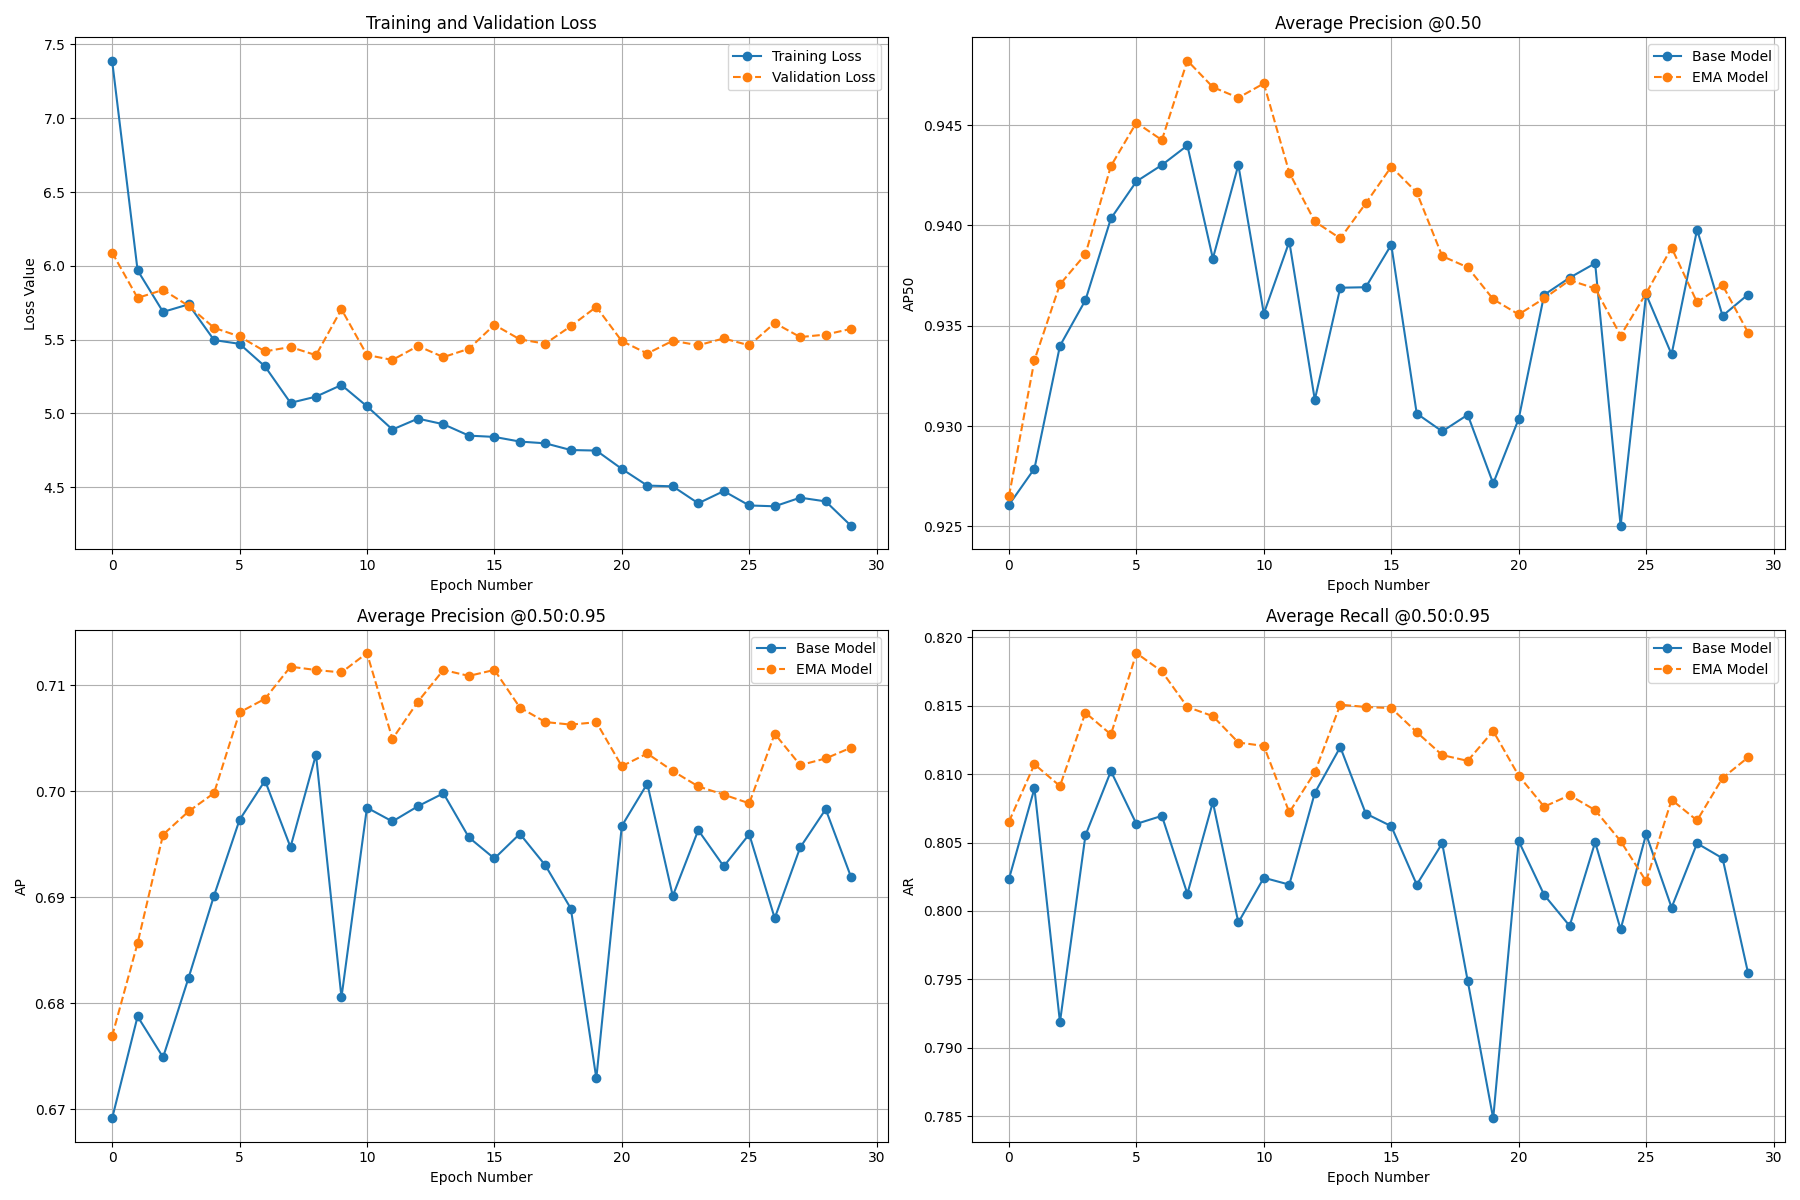

In [7]:
from PIL import Image
Image.open("/content/output/metrics_plot.png")

In [8]:
!ls -la /content/output

total 3003328
drwxr-xr-x 4 root root      4096 Oct 10 07:04 .
drwxr-xr-x 1 root root      4096 Oct 10 04:33 ..
-rw-r--r-- 1 root root 534757205 Oct 10 05:22 checkpoint0009.pth
-rw-r--r-- 1 root root 534757205 Oct 10 06:13 checkpoint0019.pth
-rw-r--r-- 1 root root 534757205 Oct 10 07:03 checkpoint0029.pth
-rw-r--r-- 1 root root 401100218 Oct 10 05:28 checkpoint_best_ema.pth
-rw-r--r-- 1 root root 401108438 Oct 10 04:42 checkpoint_best_regular.pth
-rw-r--r-- 1 root root 133666031 Oct 10 07:04 checkpoint_best_total.pth
-rw-r--r-- 1 root root 534747013 Oct 10 07:03 checkpoint.pth
drwxr-xr-x 2 root root      4096 Oct 10 04:38 eval
-rw-r--r-- 1 root root     13092 Oct 10 07:04 events.out.tfevents.1760070794.16b4b4aee006.13180.0
-rw-r--r-- 1 root root    208318 Oct 10 07:04 log.txt
-rw-r--r-- 1 root root    239482 Oct 10 07:04 metrics_plot.png
-rw-r--r-- 1 root root       634 Oct 10 07:04 results.json
drwxr-xr-x 3 root root      4096 Oct 10 04:33 wandb


## Evaluate Fine-tuned RF-DETR Model

Before benchmarking the model, we need to load the best saved checkpoint. To ensure it fits on the GPU, we first need to free up GPU memory. This involves deleting any remaining references to previously used objects, triggering Python’s garbage collector, and clearing the CUDA memory cache.

In [9]:
import gc
import torch
import weakref

def cleanup_gpu_memory(obj=None, verbose: bool = False):

    if not torch.cuda.is_available():
        if verbose:
            print("[INFO] CUDA is not available. No GPU cleanup needed.")
        return

    def get_memory_stats():
        allocated = torch.cuda.memory_allocated()
        reserved = torch.cuda.memory_reserved()
        return allocated, reserved

    torch.cuda.synchronize()

    if verbose:
        alloc, reserv = get_memory_stats()
        print(f"[Before] Allocated: {alloc / 1024**2:.2f} MB | Reserved: {reserv / 1024**2:.2f} MB")

    # Ensure we drop all strong references
    if obj is not None:
        ref = weakref.ref(obj)
        del obj
        if ref() is not None and verbose:
            print("[WARNING] Object not fully garbage collected yet.")

    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

    torch.cuda.synchronize()

    if verbose:
        alloc, reserv = get_memory_stats()
        print(f"[After]  Allocated: {alloc / 1024**2:.2f} MB | Reserved: {reserv / 1024**2:.2f} MB")

In [10]:
cleanup_gpu_memory(model, verbose=True)

[Before] Allocated: 144.77 MB | Reserved: 14640.00 MB
[WARNING] Object not fully garbage collected yet.
[After]  Allocated: 144.77 MB | Reserved: 278.00 MB


We load the best-performing model from the `checkpoint_best_total.pth` file using the `RFDETRMedium` class. This checkpoint contains the trained weights from our most successful training run. After loading, we call `optimize_for_inference()`, which prepares the model for efficient inference.

In [11]:
model = RFDETRMedium(pretrain_weights="/content/output/checkpoint_best_total.pth")
model.optimize_for_inference()

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.


reinitializing detection head with 0 classes


Loading pretrain weights


`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


In [12]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"dataset/test",
    annotations_path=f"dataset/test/_annotations.coco.json",
)

In [13]:
import supervision as sv
from tqdm import tqdm
from supervision.metrics import MeanAveragePrecision

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
    image = Image.open(path)
    detections = model.predict(image, threshold=0)

    targets.append(annotations)
    predictions.append(detections)

100%|██████████| 1092/1092 [00:31<00:00, 34.46it/s]


In [14]:
map_metric = MeanAveragePrecision()
map_result = map_metric.update(predictions, targets).compute()
print(map_result)

MeanAveragePrecisionResult:
Metric target: MetricTarget.BOXES
Class agnostic: False
mAP @ 50:95: 0.7106
mAP @ 50:    0.9462
mAP @ 75:    0.8071
mAP scores: [0.946204   0.93807082 0.92505564 0.89262467 0.8520831  0.80708178
 0.71564322 0.5875344  0.34931282 0.09223027]
IoU thresh: [0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95]
AP per class:
  0: [0.946204   0.93807082 0.92505564 0.89262467 0.8520831  0.80708178
 0.71564322 0.5875344  0.34931282 0.09223027]

Small objects:
  MeanAveragePrecisionResult:
  Metric target: MetricTarget.BOXES
  Class agnostic: False
  mAP @ 50:95: 0.7574
  mAP @ 50:    1.0000
  mAP @ 75:    1.0000
  mAP scores: [1.         1.         1.         1.         1.         1.
   1.         0.54455446 0.01456028 0.01456028]
  IoU thresh: [0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95]
  AP per class:
    0: [1.         1.         1.         1.         1.         1.
   1.         0.54455446 0.01456028 0.01456028]
  
Medium objects:
  MeanAveragePrecisionResul

## Run Inference with Fine-tuned RF-DETR Model

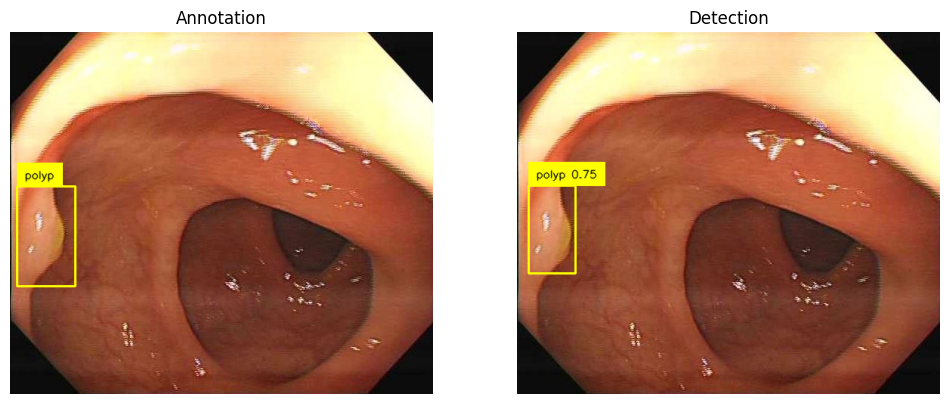

In [15]:
from rfdetr import RFDETRBase
import supervision as sv
from PIL import Image

path, image, annotations = ds[0]
image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)
color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

bbox_annotator = sv.BoxAnnotator(color=color,thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale)

annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

detections_labels = [
    f"{ds.classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

In [16]:
!pip install -q inference-gpu==0.51.7

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.56.2 requires tokenizers<=0.23.0,>=0.22.0, but you have tokenizers 0.21.4 which is incompatible.


In [17]:
from inference import get_model

MODEL_ID = "basketball-player-detection-2/13"
model_rf = get_model(model_id=MODEL_ID, api_key = userdata.get("ROBOFLOW_API_KEY"))

[10/10/25 07:05:57] WARNING  Your inference package version 0.51.7 is out of date! Please upgrade to ]8;id=161599;file:///usr/local/lib/python3.12/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=810889;file:///usr/local/lib/python3.12/dist-packages/inference/core/__init__.py#41\41]8;;\
                             version 0.58.1 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.To suppress this warning, set QWEN_2_5_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support CLIP model. Use pip install 'inference[clip]' to install missing requirements.To suppress this warning, set CORE_MODEL_CLIP_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install mi

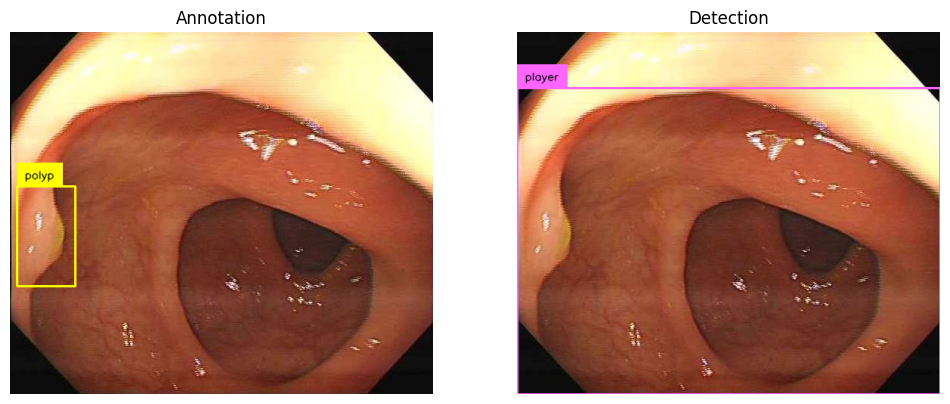

In [18]:
import supervision as sv
from PIL import Image

path, image, annotations = ds[0]
image = Image.open(path)

result = model_rf.infer(image, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)
color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

bbox_annotator = sv.BoxAnnotator(color=color,thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale)

annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

<div align="center">
  <p>
    Looking for more tutorials or have questions?
    Check out our <a href="https://github.com/roboflow/notebooks">GitHub repo</a> for more notebooks,
    or visit our <a href="https://discord.gg/GbfgXGJ8Bk">discord</a>.
  </p>
  
  <p>
    <strong>If you found this helpful, please consider giving us a ⭐
    <a href="https://github.com/roboflow/notebooks">on GitHub</a>!</strong>
  </p>

</div>

In [19]:
!zip -r /content/output.zip /content/output

  adding: content/output/ (stored 0%)
  adding: content/output/checkpoint0019.pth (deflated 8%)
  adding: content/output/events.out.tfevents.1760070794.16b4b4aee006.13180.0 (deflated 70%)
  adding: content/output/results.json (deflated 71%)
  adding: content/output/metrics_plot.png (deflated 5%)
  adding: content/output/checkpoint_best_regular.pth (deflated 8%)
  adding: content/output/checkpoint0029.pth (deflated 8%)
  adding: content/output/log.txt (deflated 80%)
  adding: content/output/checkpoint_best_ema.pth (deflated 8%)
  adding: content/output/wandb/ (stored 0%)
  adding: content/output/wandb/latest-run/ (stored 0%)
  adding: content/output/wandb/latest-run/logs/ (stored 0%)
  adding: content/output/wandb/latest-run/logs/debug-core.log (deflated 62%)
  adding: content/output/wandb/latest-run/logs/debug.log (deflated 69%)
  adding: content/output/wandb/latest-run/logs/debug-internal.log (deflated 72%)
  adding: content/output/wandb/latest-run/run-5fibsgwy.wandb (deflated 81%)
  

In [20]:
from google.colab import files

files.download('/content/output.zip')
files.download('/content/rf-detr-medium.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can now download the dataset.zip file from the file explorer in the left sidebar.

In [21]:
%pip install -q dagshub 'mlflow>=2,<3'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.4 MB/s eta 0:00:00


In [22]:
import dagshub
dagshub.init(repo_owner='farhanwew', repo_name='polyp-object-detection', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=854397f9-b484-43f0-83ad-6be82510b91d&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=58b281da482a2cc2f561bcf05267f806039fe5146f564c51a63724a8f02dad9d




Accessing as farhanwew

Initialized MLflow to track repo "farhanwew/polyp-object-detection"

Repository farhanwew/polyp-object-detection initialized!

In [23]:
import mlflow

# Set nama eksperimen (otomatis dibuat kalau belum ada)
mlflow.set_experiment("RF-DETR")

with mlflow.start_run(run_name="run-1"):
    # Simpan folder hasil ke MLflow
    mlflow.log_artifacts("/content/output", artifact_path="predictions")

print("📦 Folder /content/output berhasil disimpan di MLflow (artifact 'predictions').")


2025/10/10 07:19:29 INFO mlflow.tracking.fluent: Experiment with name 'RF-DETR' does not exist. Creating a new experiment.


🏃 View run run-1 at: https://dagshub.com/farhanwew/polyp-object-detection.mlflow/#/experiments/3/runs/728a52d3b5044555bf23fcb95a6e87aa
🧪 View experiment at: https://dagshub.com/farhanwew/polyp-object-detection.mlflow/#/experiments/3
📦 Folder /content/output berhasil disimpan di MLflow (artifact 'predictions').
